## ELG-5196 Course Project  
### A computer-based method for diagnoses of Parkinson Disease  
This project makes use of Multi-Layer-Perceptrons (MLP) to classify if a patient has Parkinson's Disease based on the record of their speech.

## Importing Libraries

In [0]:
import numpy as np 
import pandas as pd
import seaborn as sns
from math import ceil 
from scipy.stats import spearmanr
from sklearn.metrics import classification_report
from scipy.stats import iqr
import time
import matplotlib.pyplot as plt

## Loading dataset  
The dataset were obtained from the UCI (Machine Learning Repository)

In [0]:
Data = pd.read_csv("parkinsons.data", delimiter=",")
Data.reset_index(drop=True, inplace=True)
Data.drop(columns='name',inplace=True)

## Analysis of the dataset

Number of each class

In [5]:
Data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

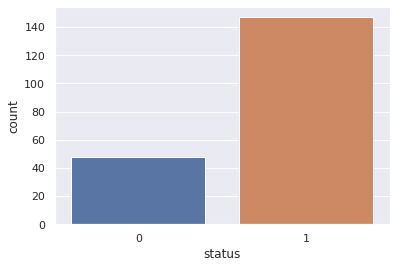

In [6]:
sns.set(style="darkgrid")
ax = sns.countplot(x="status", data=Data)

Correlation between features

In [7]:
corr = Data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1,0.4,0.6,-0.12,-0.38,-0.076,-0.11,-0.076,-0.098,-0.074,-0.095,-0.071,-0.078,-0.095,-0.022,0.059,-0.38,-0.38,-0.45,-0.41,-0.25,0.18,-0.37
MDVP:Fhi(Hz),0.4,1,0.085,0.1,-0.029,0.097,0.091,0.097,0.0023,0.043,-0.0037,-0.01,0.0049,-0.0037,0.16,-0.025,-0.17,-0.11,-0.34,-0.077,-0.003,0.18,-0.07
MDVP:Flo(Hz),0.6,0.085,1,-0.14,-0.28,-0.1,-0.096,-0.1,-0.14,-0.12,-0.15,-0.1,-0.11,-0.15,-0.11,0.21,-0.38,-0.4,-0.05,-0.39,-0.24,-0.1,-0.34
MDVP:Jitter(%),-0.12,0.1,-0.14,1,0.94,0.99,0.97,0.99,0.77,0.8,0.75,0.73,0.76,0.75,0.91,-0.73,0.28,0.36,0.099,0.69,0.39,0.43,0.72
MDVP:Jitter(Abs),-0.38,-0.029,-0.28,0.94,1,0.92,0.9,0.92,0.7,0.72,0.7,0.65,0.65,0.7,0.83,-0.66,0.34,0.44,0.18,0.74,0.39,0.31,0.75
MDVP:RAP,-0.076,0.097,-0.1,0.99,0.92,1,0.96,1,0.76,0.79,0.74,0.71,0.74,0.74,0.92,-0.72,0.27,0.34,0.064,0.65,0.32,0.43,0.67
MDVP:PPQ,-0.11,0.091,-0.096,0.97,0.9,0.96,1,0.96,0.8,0.84,0.76,0.79,0.8,0.76,0.84,-0.73,0.29,0.33,0.2,0.72,0.41,0.41,0.77
Jitter:DDP,-0.076,0.097,-0.1,0.99,0.92,1,0.96,1,0.76,0.79,0.74,0.71,0.74,0.74,0.92,-0.72,0.27,0.34,0.064,0.65,0.32,0.43,0.67
MDVP:Shimmer,-0.098,0.0023,-0.14,0.77,0.7,0.76,0.8,0.76,1,0.99,0.99,0.98,0.95,0.99,0.72,-0.84,0.37,0.45,0.16,0.65,0.45,0.51,0.69
MDVP:Shimmer(dB),-0.074,0.043,-0.12,0.8,0.72,0.79,0.84,0.79,0.99,1,0.96,0.97,0.96,0.96,0.74,-0.83,0.35,0.41,0.17,0.65,0.45,0.51,0.7


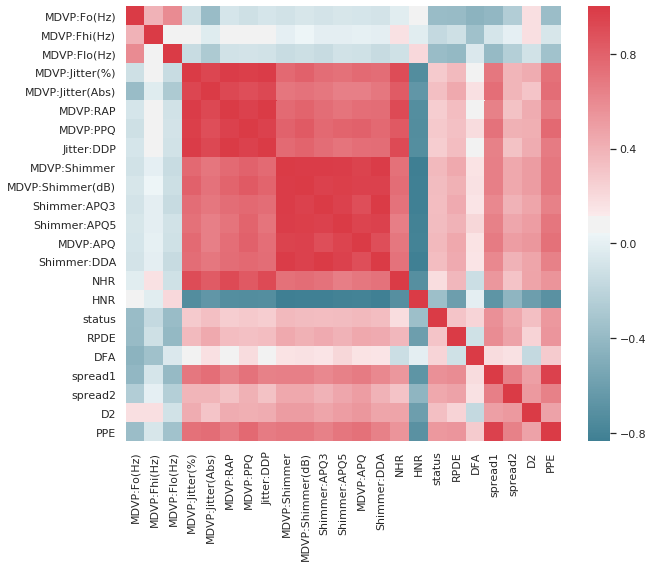

In [8]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

### Analysing Features

In [0]:
target = "status"
X = Data.loc[:, Data.columns != target]
Y = Data.loc[:, Data.columns == target]

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE                 195 non-null f

In [11]:
Data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [0]:
columns = Data.columns
Feature_Set = pd.DataFrame(columns=['Feature','min','max','Outliers','null?','corr'])
for feature in columns:
    iqr_ = iqr(Data[feature])
    st, td = Data[feature].quantile([0.25,0.75])
    Up_bound = td + iqr_
    Lw_bound = st - iqr_
    outliers = Data[Data[feature] > Up_bound][feature]
    any_outlier = outliers.size
    min_ = Data[feature].min()
    max_ = Data[feature].max()
    null_ = Data[feature].isnull().unique()
    spearman = spearmanr(Data[feature], Data['status'])
    new_row = {'Feature':feature,'min':min_,'max':max_,'Outliers':any_outlier,'null?':null_,'corr':abs(spearman[0])}
    Feature_Set = Feature_Set.append(new_row,ignore_index=True)

### Outlier Detection

[]

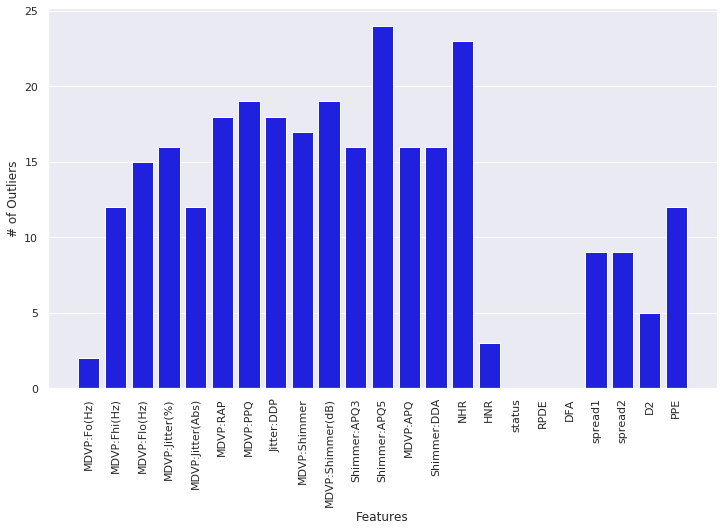

In [13]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=Feature_Set['Feature'], y=Feature_Set['Outliers'], color = 'blue')
ax.set(xlabel='Features', ylabel='# of Outliers')
ax.set_xticklabels(labels=columns,rotation=90)
ax.plot()

### Range of each feature  
It shows that it is needed to normalize the variables.

[]

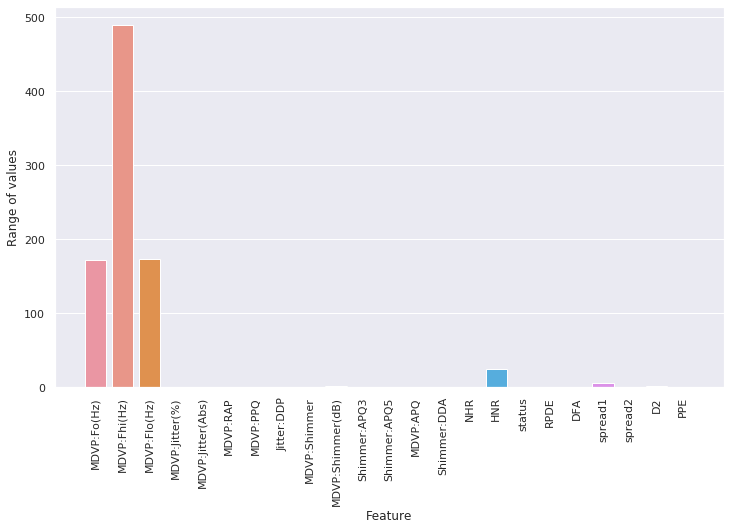

In [14]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=Feature_Set['Feature'], y=(Feature_Set['max']-Feature_Set['min']))
ax.set(ylabel='Range of values')
ax.set_xticklabels(labels=columns,rotation=90)
ax.plot()

In [16]:
Feature_Set

,Feature,min,max,Outliers,null?,corr
0,MDVP:Fo(Hz),88.333000,260.105000,2,[False],0.299465
1,MDVP:Fhi(Hz),102.145000,592.030000,12,[False],0.260974
2,MDVP:Flo(Hz),65.476000,239.170000,15,[False],0.294389
3,MDVP:Jitter(%),0.001680,0.033160,16,[False],0.414412
4,MDVP:Jitter(Abs),0.000007,0.000260,12,[False],0.435938
5,MDVP:RAP,0.000680,0.021440,18,[False],0.413255
6,MDVP:PPQ,0.000920,0.019580,19,[False],0.428585
7,Jitter:DDP,0.002040,0.064330,18,[False],0.413987
8,MDVP:Shimmer,0.009540,0.119080,17,[False],0.421917
9,MDVP:Shimmer(dB),0.085000,1.302000,19,[False],0.425419


### Correlation from features to the target

In [0]:
Feature_Set.drop(16, inplace=True)
Feature_Set = Feature_Set.sort_values(by='corr')
Feature_Set.reset_index(drop=True, inplace=True)

[]

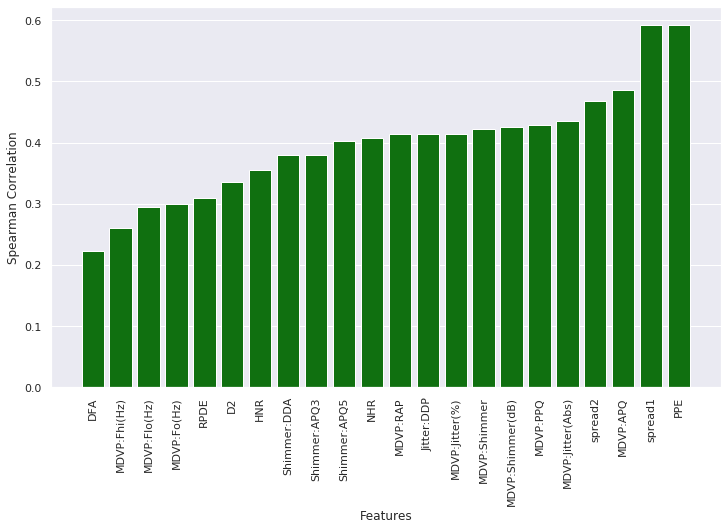

In [18]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=Feature_Set['Feature'], y=Feature_Set['corr'], color = 'green')
ax.set(xlabel='Features', ylabel='Spearman Correlation')
ax.set_xticklabels(labels=Feature_Set['Feature'],rotation=90)
ax.plot()

### Some examples of features showing the correlation with the class
spread1 and PPE are the most correlated, DFA the less. 

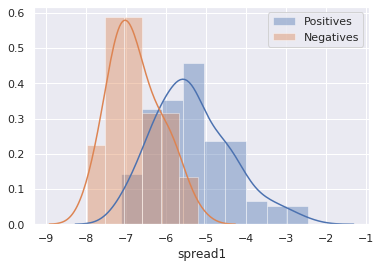

In [19]:
#Feature spread1 
sns.distplot(Data[Data['status'] == 1]['spread1'], label="Positives")
sns.distplot(Data[Data['status'] == 0]['spread1'], label="Negatives").legend()

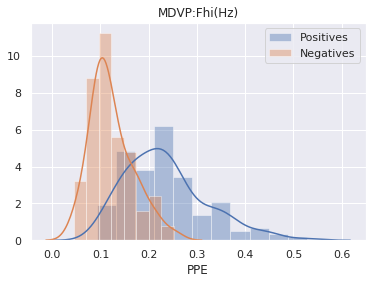

In [20]:
#Feature PPE 
sns.distplot(Data[Data['status'] == 1]['PPE'], label="Positives").set_title(columns[1])
sns.distplot(Data[Data['status'] == 0]['PPE'], label="Negatives").legend()

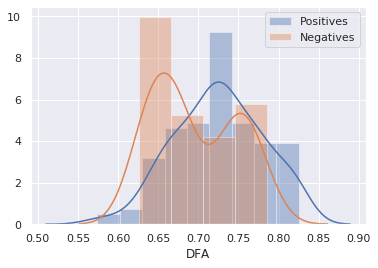

In [21]:
#Feature DFA 
sns.distplot(Data[Data['status'] == 1]['DFA'], label="Positives")
sns.distplot(Data[Data['status'] == 0]['DFA'], label="Negatives").legend()

## Preprocessing

In [0]:
from sklearn.preprocessing import StandardScaler 

### Converting data to Numpy

In [22]:
# Converting Data to numpy 
X, y = Data[Data.columns[range(0,23)]].to_numpy(), Data['status'].to_numpy()
X = np.delete(X,16,axis=1)
y[(y == 'P')] = 1
y[(y == 'N')] = 0
y = y.astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


### Data Normalization

In [0]:
scaler = StandardScaler()  
scaler.fit(X)  
X = scaler.transform(X)  

## Model Construction  
#### Model built using keras library

#### Importing Keras methods

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

Using TensorFlow backend.


#### Building the MLP Architecture

In [26]:
model = Sequential()
model.add(Dense(20, input_dim=22, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile( loss = "binary_crossentropy", 
               optimizer = sgd, 
               metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Model Evaluation  
Using 3-Fold Cross-Validation 

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

Using Stratified Splitting to keep the class-imbalance

In [0]:
skf = StratifiedKFold(n_splits=3)

In [29]:
# Training Classifier
i=0
t_tn, t_fp, t_fn, t_tp = 0,0,0,0
start = time.time()
y_ = np.zeros([195,])
for train, test in skf.split(X, y):
    # fit the keras model on the dataset
    model.fit(X[train], y[train], epochs=100, batch_size=20,verbose=0)
    print('fold',i, 'time elapsed:', (time.time() - start)) 
    y_hat = model.predict_classes(X[test])   
    y_[test] = y_hat[:,0]
    # Compute metrics
    print(classification_report(y[test], y_hat))
    # Compute Confusion Matrix
    tn_, fp_, fn_, tp_ = confusion_matrix(y[test],y_hat).ravel()
    t_tn += tn_
    t_fp += fp_
    t_fn += fn_
    t_tp += tp_
    print('TP',tp_,'TN',tn_,'FP',fp_,'FN',fn_)
    i+=1









fold 0 time elapsed: 1.7726283073425293
              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.87      0.92      0.89        49

    accuracy                           0.83        65
   macro avg       0.78      0.74      0.76        65
weighted avg       0.82      0.83      0.82        65

TP 45 TN 9 FP 7 FN 4
fold 1 time elapsed: 2.5325539112091064
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.98      0.98      0.98        49

    accuracy                           0.97        65
   macro avg       0.96      0.96      0.96        65
weighted avg       0.97      0.97      0.97        65

TP 48 TN 15 FP 1 FN 1
fold 2 time elapsed: 3.256364107131958
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.98      0.98      0.98        49

    accuracy

In [45]:
print("=== Confusion Matrix ===")
print(t_tp, t_fp, "\n",t_fn, t_tn)
print('\n')
print("=== Classification Report ===")
print(classification_report(y[test], y_hat))
print('\n')

=== Confusion Matrix ===
141 9 
 6 39


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.98      0.98      0.98        49

    accuracy                           0.97        65
   macro avg       0.96      0.96      0.96        65
weighted avg       0.97      0.97      0.97        65





## Dummy Classifier
Building a Dummy Classifier to check if this method is better than random

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
, f1_score, confusion_matrix, precision_recall_curve,  roc_curve, roc_auc_score, classification_report

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=8, stratify = Y)

In [37]:
dc = DummyClassifier(strategy='stratified', random_state=0)
dc.fit(x_train, y_train)
dc.score(x_test, y_test)

0.7692307692307693

In [0]:
y_hat_dc = dc.predict(x_test)
score_dc = accuracy_score(y_test, y_hat_dc)
y_pred_dc = dc.predict_proba(x_test)

In [0]:
precision, recall, _, _ = precision_recall_fscore_support(y_test, y_hat_dc, average='binary')

In [42]:
precision, recall

(0.8846153846153846, 0.7931034482758621)

In [0]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_dc).ravel()

In [44]:
print("=== Confusion Matrix ===")
print(tp, fp, "\n",fn, tn)
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_hat_dc))
print('\n')

=== Confusion Matrix ===
23 3 
 6 7


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.54      0.70      0.61        10
           1       0.88      0.79      0.84        29

    accuracy                           0.77        39
   macro avg       0.71      0.75      0.72        39
weighted avg       0.80      0.77      0.78        39



